In [1]:
import numpy as np
import json
import os
import pickle
import matplotlib.pyplot as plt
import faceted 
import scipy.stats as stats
from matplotlib.legend_handler import HandlerBase
import utils
import seaborn as sns
print("Computing Figure 1...... ")

Computing Figure 1...... 


/home/tarshish/micromamba/envs/zec/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
utils.set_plot_configs(plt, fsize=8)

In [3]:
results_dir = os.path.realpath('results/')

data = results_dir + '/ZECMIP_data.json'

print("Loading in ZECMIP data from data.json... ")
with open(data) as file:
    ZECMIP = json.load(file)
    
# convert data from lists to arrays
for model in ZECMIP.keys():
    for exp in ["750", "1000", "2000"]:
        if exp in ZECMIP[model].keys():
            for var in ZECMIP[model][exp].keys():
                ZECMIP[model][exp][var] = np.array(ZECMIP[model][exp][var])

Loading in ZECMIP data from data.json... 


FileNotFoundError: [Errno 2] No such file or directory: '/home/tarshish/Documents/research/zec/workflow/notebooks/results/ZECMIP_data.json'

In [17]:
markers = ["^", "s", "o"]

EMICs = ['BERN-ecs2k', 'BERN-ecs3k', 'BERN-ecs5k', 'CLIMBER2', 'DCESS', 'IAPRAS',
         'LOVECLIM', 'MESM', 'MIROC-lite', 'PLASIM-GENIE', 'UVic']

In [24]:
del(ZECMIP["BERN-ecs3k"])

In [25]:
# Plotting on ax1 (first subplot)
data = {}
for name in ZECMIP:
    data[name] = {}
    d = ZECMIP[name]["1000"]
    data[name]['ZEC'] = d['delta_t_avg'][d['index'] >= int(d['stop_index'])] - d['delta_t_avg'][int(d['stop_index'])]

In [26]:
EMIC_data = {}
CMIP_data = {}
for name in data:
    if name in EMICs:
        EMIC_data[name] = data[name]
    else:
        CMIP_data[name] = data[name]

In [27]:
def sort_and_assign_color(data):
    zec_values = []
    for name in data:
        zec = data[name]['ZEC']
        zec = zec[~np.isnan(zec)][-1]
        zec_values.append((name, zec))
        
    zec_values_sorted = sorted(zec_values, key=lambda x: x[1], reverse=True)
    
    # Print the ranked list
    print("Ranked list of ZEC values for the models:")
    for rank, (name, zec) in enumerate(zec_values_sorted, start=1):
        data[name]["color"] = sns.color_palette("tab10")[rank-1]
        data[name]["final_zec"] = zec
        data[name]["rank"] = rank

In [29]:
sort_and_assign_color(EMIC_data)
sort_and_assign_color(CMIP_data)

Ranked list of ZEC values for the models:
Ranked list of ZEC values for the models:


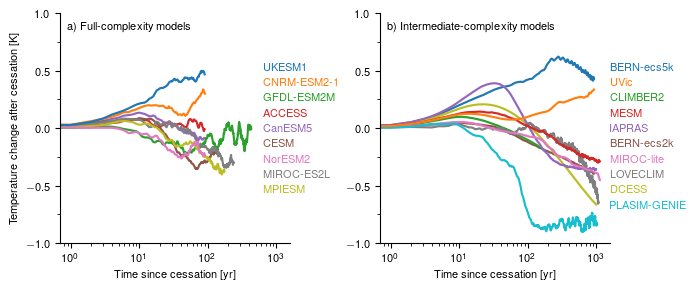

In [30]:
# Assuming the necessary data structures are defined (e.g., ZECMIP, EMICs, front, markers)
# height calculation remains the same

# fig, (ax1, ax) = plt.subplots(1, 2, figsize=(7, 3.42), sharey=False, sharex=False)
# plt.subplots_adjust(wspace=0.4)

fig, axis = faceted.faceted(1,2,sharex=True,width=7, aspect=1.0, sharey=False,
                           top_pad=.1,
                           bottom_pad=.45,
                           right_pad=.9,
                           left_pad=.7,
                           internal_pad=1.8,
                           )

ax1, ax = axis


# Plotting on ax1 (first subplot)
for name in CMIP_data:
    d = CMIP_data[name]
    ax1.plot(
            np.arange(len(d['ZEC'])),
            d['ZEC'],
            color=d['color'],
            alpha=1,
            label=name,
            linewidth=1.55,
    )

# Plotting on ax1 (first subplot)
for name in EMIC_data:
    d = EMIC_data[name]
    ax.plot(
            np.arange(len(d['ZEC'])),
            d['ZEC'],
            color=d['color'],
            alpha=1,
            label=name,
            linewidth=1.55,
    )

for ax, label in zip(axis, ["a) Full-complexity models", "b) Intermediate-complexity models"]):
    
    ax.text(
        0.03,
        0.94,
        label,
        transform=ax.transAxes,
        horizontalalignment="left",
        verticalalignment="center",
    )

sns.despine()

for ax in axis:
    ax.semilogx()
    ax.set_ylim([-1, 1])
    ax.set_yticks([-1, -.5, 0, .5, 1])
    ax.set_yticks([-.75, -.25, .25, .75], minor=True)
    ax.set_xlabel(r"Time since cessation [yr]")
    ax.set_ylabel(r"Temperature change after cessation [K]")


# for ax in ax
# ax1.set_ylabel(r"Temperature change after cessation [K]")


for model in CMIP_data:
    i = CMIP_data[model]["rank"]
    ax1.text(.88, .5 + (5-i)/15, model, ha="left", va="center", transform=ax1.transAxes,
             color=CMIP_data[model]["color"])

for model in EMIC_data:
    i = EMIC_data[model]["rank"]
    ax.text(1, .5 + (5-i)/15, model, ha="left", va="center", transform=ax.transAxes,
             color=EMIC_data[model]["color"])
    
outpath = results_dir+"/figures/fig_1.pdf"
fig.savefig(outpath)